In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [ ]:
# Step 1: Generate random data points for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)


In [ ]:
# Step 2: Define the DBSCAN model
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples is the minimum number of samples required to form a dense region (core point)
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
# Step 3: Fit the model to the data and predict clusters
# labels will contain the cluster index for each point, with -1 indicating noise (outliers)
clusters = dbscan.fit_predict(X)

In [ ]:
# Step 4: Plot the clustered data
def plot_dbscan(X, clusters):
    plt.figure(figsize=(8, 6))

    # Scatter plot for data points, colored by their assigned clusters
    # We use a different color for outliers (marked as -1 in the clusters array)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=30)

    # Highlight the outliers by coloring them in red
    outliers = X[clusters == -1]
    plt.scatter(outliers[:, 0], outliers[:, 1], c='red', s=50, label="Outliers")

    # Title and labels
    plt.title("DBSCAN Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

    plt.show()

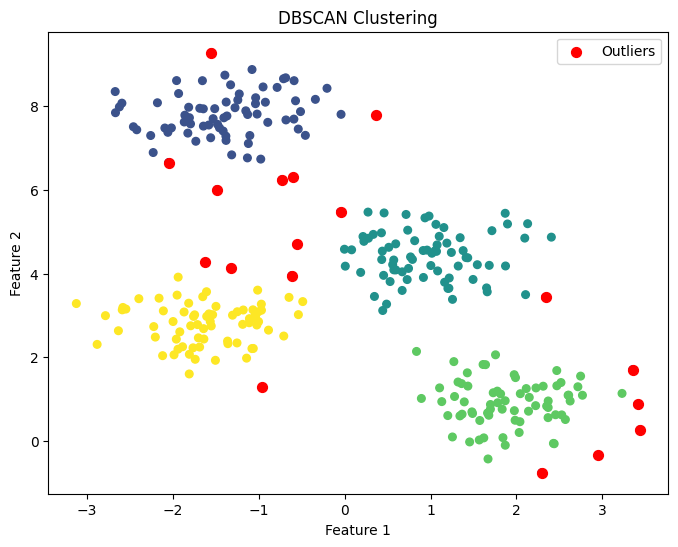

In [ ]:
# Step 5: Visualize the results
plot_dbscan(X, clusters)

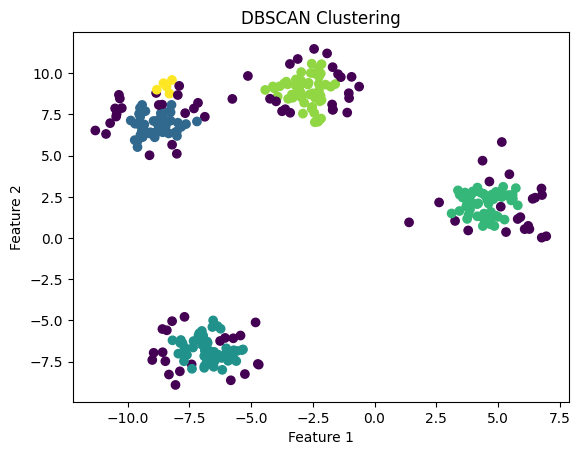

In [1]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def dbscan(X, epsilon, min_samples):
    # Initialize labels for each point in the dataset.
    # 0 indicates the point has not been visited yet, -1 will mark noise.
    labels = np.zeros(X.shape[0], dtype=int)  # Initialize all labels to 0
    cluster_id = 0  # Initialize cluster ID counter

    # Function to find all neighbors of a point within a specified epsilon distance.
    def get_neighbors(point_idx):
        # Calculate the Euclidean distance from the point at point_idx to all other points.
        distances = euclidean_distances([X[point_idx]], X)[0]
        # Return indices of points where the distance is less than or equal to epsilon.
        return np.where(distances <= epsilon)[0]

    # Function to expand a cluster starting from a core point.
    def expand_cluster(point_idx, neighbors):
        nonlocal cluster_id  # Use the cluster_id from the outer function
        labels[point_idx] = cluster_id  # Assign the current cluster ID to the core point
        i = 0  # Initialize index for the neighbors list

        while i < len(neighbors):
            neighbor_idx = neighbors[i]  # Get the index of the neighbor
            if labels[neighbor_idx] == 0:  # If the neighbor has not been visited
                labels[neighbor_idx] = cluster_id  # Assign the current cluster ID
                # Get neighbors of this neighbor
                neighbor_neighbors = get_neighbors(neighbor_idx)
                # If the neighbor has enough neighbors, include them in the current cluster
                if len(neighbor_neighbors) >= min_samples:
                    # Add these new neighbors to the list of neighbors to process
                    neighbors = np.append(neighbors, neighbor_neighbors)
            elif labels[neighbor_idx] == -1:  # If the neighbor is marked as noise
                labels[neighbor_idx] = cluster_id  # Reassign it to the current cluster ID
            i += 1  # Move to the next neighbor

    # Main DBSCAN algorithm
    for point_idx in range(X.shape[0]):  # Iterate over each point in the dataset
        if labels[point_idx] == 0:  # Check if the point has not been visited (label is 0)
            neighbors = get_neighbors(point_idx)  # Find all neighbors of the current point within epsilon distance

            if len(neighbors) < min_samples:  # If the number of neighbors is less than min_samples
                labels[point_idx] = -1  # Mark this point as noise (outlier)
            else:
                cluster_id += 1  # Increment the cluster ID for the new cluster
                expand_cluster(point_idx, neighbors)  # Expand the cluster starting from this point and its neighbors

    return labels  # Return the final labels for all points, where each label indicates the cluster ID or noise


# Example usage
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# DBSCAN parameters
epsilon = 0.5
min_samples = 5

# Run DBSCAN
labels = dbscan(X, epsilon, min_samples)

# Plot results
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
